In [4]:
from notebook_utils import evaluate

In [39]:
results = []
for (lang1, lang2) in [("cs", "uk"), ("en", "cs")]:
    print(f"{lang1}-{lang2}")
    for i in range(1, 10 + (1 if lang1 == "cs" else 0)):
        aer,_,_,_ = evaluate(f"./data/annotated/{lang1}-{lang2}/{lang1}{lang2}_{i}.gold", f"./finetune/mbert_multilingual_1M-per-lang_only_tlm_add_so_lr5e-6/checkpoint-8600/{lang1}{lang2}_{i}.awesome-align.out", [])
        lines = open(f"./data/annotated/{lang1}-{lang2}/{lang1}{lang2}_{i}.src-tgt").readlines()
        avg_words = sum(map(lambda l: len(l.split()), lines))/len(lines)
        # print()
        # print(aer)
        results.append({
            "aer": aer,
            "avg_words": avg_words,
            "lang_pair": f"{lang1}-{lang2}"
        })

cs-uk
en-cs


In [40]:
import seaborn as sns
import pandas as pd

Text(0.5, 1.0, 'AER vs. average number of words in paragraph')

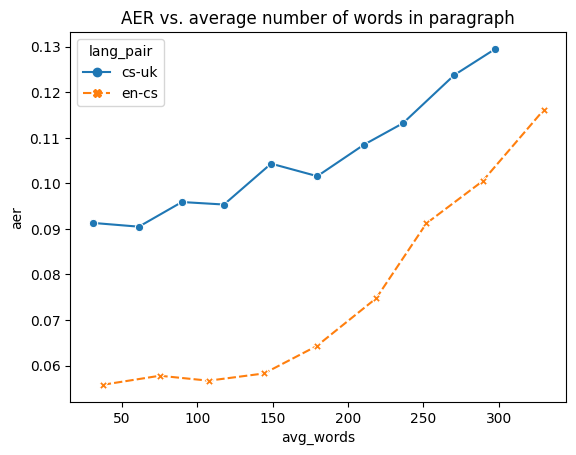

In [41]:
df = pd.DataFrame(results)
sns.lineplot(data=df, x="avg_words", y="aer", hue="lang_pair", style="lang_pair", markers=True).set_title("AER vs. average number of words in paragraph")

In [57]:
import transformers
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

lang1 = "en"
lang2 = "cs"
lines = open(f"./data/annotated/{lang1}-{lang2}/{lang1}{lang2}_7.src-tgt").readlines()


In [58]:
src = tokenizer([line.split(" ||| ")[0] for line in lines])["input_ids"]
print(sum(list(map(lambda toks: len(toks) > 250, src))))

src = tokenizer([line.split(" ||| ")[1] for line in lines])["input_ids"]
print(sum(list(map(lambda toks: len(toks) > 250, src))))

2
142
